In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data = pd.read_csv('/kaggle/input/dataset/aug_labels.tsv', sep='\t')
#Panda adds a random column to the data so do:
data = data.drop(columns='Unnamed: 0')

print(data.shape) # >>> should be like (22803,1) or smth

#Convert the dataframe to a list

labels = data.values.tolist() #you now have a list of the labels


images = torch.load('/kaggle/input/dataset/aug_images.pt').type(torch.uint8)
print(images.shape) #should be the 22803,3,224,224

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5
/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/resnet50/imagenet_class_index.json
/kaggle/input/dataset/aug_labels.tsv
/kaggle/input/dataset/aug_images.pt
(22804, 1)
['a very typical bus station']
torch.Size([22804, 3, 224, 224])


In [3]:
class RuleBasedModel(nn.Module):
  def __init__(self):
    super(RuleBasedModel, self).__init__()

    self.cnn = models.resnet50(pretrained=True)

    for parameter in self.cnn.parameters():
      parameter.requires_grad = False

    self.rules = {
        0: "tench",
        1: "goldfish",
        2: "great white shark",
        3: "tiger shark",
        4: "hammerhead",
        5: "electric ray",
        6: "stingray",
        7: "cock",
        8: "hen",
        9: "ostrich",
        10: "brambling",
        11: "goldfinch",
        12: "house finch",
        13: "junco",
        14: "indigo bunting",
        15: "robin",
        16: "bulbul",
        17: "jay",
        18: "magpie",
        19: "chickadee",
        20: "water ouzel",
        21: "kite",
        22: "bald eagle",
        23: "vulture",
        24: "great grey owl",
        25: "European fire salamander",
        26: "common newt",
        27: "eft",
        28: "spotted salamander",
        29: "axolotl",
        30: "bullfrog",
        31: "tree frog",
        32: "tailed frog",
        33: "loggerhead",
        34: "leatherback turtle",
        35: "mud turtle",
        36: "terrapin",
        37: "box turtle",
        38: "banded gecko",
        39: "common iguana",
        40: "American chameleon",
        41: "whiptail",
        42: "agama",
        43: "frilled lizard",
        44: "alligator lizard",
        45: "Gila monster",
        46: "green lizard",
        47: "African chameleon",
        48: "Komodo dragon",
        49: "African crocodile",
        50: "American alligator",
        51: "triceratops",
        52: "thunder snake",
        53: "ringneck snake",
        54: "hognose snake",
        55: "green snake",
        56: "king snake",
        57: "garter snake",
        58: "water snake",
        59: "vine snake",
        60: "night snake",
        61: "boa constrictor",
        62: "rock python",
        63: "Indian cobra",
        64: "green mamba",
        65: "sea snake",
        66: "horned viper",
        67: "diamondback",
        68: "sidewinder",
        69: "trilobite",
        70: "harvestman",
        71: "scorpion",
        72: "black and gold garden spider",
        73: "barn spider",
        74: "garden spider",
        75: "black widow",
        76: "tarantula",
        77: "wolf spider",
        78: "tick",
        79: "centipede",
        80: "black grouse",
        81: "ptarmigan",
        82: "ruffed grouse",
        83: "prairie chicken",
        84: "peacock",
        85: "quail",
        86: "partridge",
        87: "African grey",
        88: "macaw",
        89: "sulphur-crested cockatoo",
        90: "lorikeet",
        91: "coucal",
        92: "bee eater",
        93: "hornbill",
        94: "hummingbird",
        95: "jacamar",
        96: "toucan",
        97: "drake",
        98: "red-breasted merganser",
        99: "goose",
        100: "black swan",
        101: "tusker",
        102: "echidna",
        103: "platypus",
        104: "wallaby",
        105: "koala",
        106: "wombat",
        107: "jellyfish",
        108: "sea anemone",
        109: "brain coral",
        110: "flatworm",
        111: "nematode",
        112: "conch",
        113: "snail",
        114: "slug",
        115: "sea slug",
        116: "chiton",
        117: "chambered nautilus",
        118: "Dungeness crab",
        119: "rock crab",
        120: "fiddler crab",
        121: "king crab",
        122: "American lobster",
        123: "spiny lobster",
        124: "crayfish",
        125: "hermit crab",
        126: "isopod",
        127: "white stork",
        128: "black stork",
        129: "spoonbill",
        130: "flamingo",
        131: "little blue heron",
        132: "American egret",
        133: "bittern",
        134: "crane",
        135: "limpkin",
        136: "European gallinule",
        137: "American coot",
        138: "bustard",
        139: "ruddy turnstone",
        140: "red-backed sandpiper",
        141: "redshank",
        142: "dowitcher",
        143: "oystercatcher",
        144: "pelican",
        145: "king penguin",
        146: "albatross",
        147: "grey whale",
        148: "killer whale",
        149: "dugong",
        150: "sea lion",
        151: "Chihuahua",
        152: "Japanese spaniel",
        153: "Maltese dog",
        154: "Pekinese",
        155: "Shih-Tzu",
        156: "Blenheim spaniel",
        157: "papillon",
        158: "toy terrier",
        159: "Rhodesian ridgeback",
        160: "Afghan hound",
        161: "basset",
        162: "beagle",
        163: "bloodhound",
        164: "bluetick",
        165: "black-and-tan coonhound",
        166: "Walker hound",
        167: "English foxhound",
        168: "redbone",
        169: "borzoi",
        170: "Irish wolfhound",
        171: "Italian greyhound",
        172: "whippet",
        173: "Ibizan hound",
        174: "Norwegian elkhound",
        175: "otterhound",
        176: "Saluki",
        177: "Scottish deerhound",
        178: "Weimaraner",
        179: "Staffordshire bullterrier",
        180: "American Staffordshire terrier",
        181: "Bedlington terrier",
        182: "Border terrier",
        183: "Kerry blue terrier",
        184: "Irish terrier",
        185: "Norfolk terrier",
        186: "Norwich terrier",
        187: "Yorkshire terrier",
        188: "wire-haired fox terrier",
        189: "Lakeland terrier",
        190: "Sealyham terrier",
        191: "Airedale",
        192: "cairn",
        193: "Australian terrier",
        194: "Dandie Dinmont",
        195: "Boston bull",
        196: "miniature schnauzer",
        197: "giant schnauzer",
        198: "standard schnauzer",
        199: "Scotch terrier",
        200: "Tibetan terrier",
        201: "silky terrier",
        202: "soft-coated wheaten terrier",
        203: "West Highland white terrier",
        204: "Lhasa",
        205: "flat-coated retriever",
        206: "curly-coated retriever",
        207: "golden retriever",
        208: "Labrador retriever",
        209: "Chesapeake Bay retriever",
        210: "German short-haired pointer",
        211: "vizsla",
        212: "English setter",
        213: "Irish setter",
        214: "Gordon setter",
        215: "Brittany spaniel",
        216: "clumber",
        217: "English springer",
        218: "Welsh springer spaniel",
        219: "cocker spaniel",
        220: "Sussex spaniel",
        221: "Irish water spaniel",
        222: "kuvasz",
        223: "schipperke",
        224: "groenendael",
        225: "malinois",
        226: "briard",
        227: "kelpie",
        228: "komondor",
        229: "Old English sheepdog",
        230: "Shetland sheepdog",
        231: "collie",
        232: "Border collie",
        233: "Bouvier des Flandres",
        234: "Rottweiler",
        235: "German shepherd",
        236: "Doberman",
        237: "miniature pinscher",
        238: "Greater Swiss Mountain dog",
        239: "Bernese mountain dog",
        240: "Appenzeller",
        241: "EntleBucher",
        242: "boxer",
        243: "bull mastiff",
        244: "Tibetan mastiff",
        245: "French bulldog",
        246: "Great Dane",
        247: "Saint Bernard",
        248: "Eskimo dog",
        249: "malamute",
        250: "Siberian husky",
        251: "dalmatian",
        252: "affenpinscher",
        253: "basenji",
        254: "pug",
        255: "Leonberg",
        256: "Newfoundland",
        257: "Great Pyrenees",
        258: "Samoyed",
        259: "Pomeranian",
        260: "chow",
        261: "keeshond",
        262: "Brabancon griffon",
        263: "Pembroke",
        264: "Cardigan",
        265: "toy poodle",
        266: "miniature poodle",
        267: "standard poodle",
        268: "Mexican hairless",
        269: "timber wolf",
        270: "white wolf",
        271: "red wolf",
        272: "coyote",
        273: "dingo",
        274: "dhole",
        275: "African hunting dog",
        276: "hyena",
        277: "red fox",
        278: "kit fox",
        279: "Arctic fox",
        280: "grey fox",
        281: "tabby",
        282: "tiger cat",
        283: "Persian cat",
        284: "Siamese cat",
        285: "Egyptian cat",
        286: "cougar",
        287: "lynx",
        288: "leopard",
        289: "snow leopard",
        290: "jaguar",
        291: "lion",
        292: "tiger",
        293: "cheetah",
        294: "brown bear",
        295: "American black bear",
        296: "ice bear",
        297: "sloth bear",
        298: "mongoose",
        299: "meerkat",
        300: "tiger beetle",
        301: "ladybug",
        302: "ground beetle",
        303: "long-horned beetle",
        304: "leaf beetle",
        305: "dung beetle",
        306: "rhinoceros beetle",
        307: "weevil",
        308: "fly",
        309: "bee",
        310: "ant",
        311: "grasshopper",
        312: "cricket",
        313: "walking stick",
        314: "cockroach",
        315: "mantis",
        316: "cicada",
        317: "leafhopper",
        318: "lacewing",
        319: "dragonfly",
        320: "damselfly",
        321: "admiral",
        322: "ringlet",
        323: "monarch",
        324: "cabbage butterfly",
        325: "sulphur butterfly",
        326: "lycaenid",
        327: "starfish",
        328: "sea urchin",
        329: "sea cucumber",
        330: "wood rabbit",
        331: "hare",
        332: "Angora",
        333: "hamster",
        334: "porcupine",
        335: "fox squirrel",
        336: "marmot",
        337: "beaver",
        338: "guinea pig",
        339: "sorrel",
        340: "zebra",
        341: "hog",
        342: "wild boar",
        343: "warthog",
        344: "hippopotamus",
        345: "ox",
        346: "water buffalo",
        347: "bison",
        348: "ram",
        349: "bighorn",
        350: "ibex",
        351: "hartebeest",
        352: "impala",
        353: "gazelle",
        354: "Arabian camel",
        355: "llama",
        356: "weasel",
        357: "mink",
        358: "polecat",
        359: "black-footed ferret",
        360: "otter",
        361: "skunk",
        362: "badger",
        363: "armadillo",
        364: "three-toed sloth",
        365: "orangutan",
        366: "gorilla",
        367: "chimpanzee",
        368: "gibbon",
        369: "siamang",
        370: "guenon",
        371: "patas",
        372: "baboon",
        373: "macaque",
        374: "langur",
        375: "colobus",
        376: "proboscis monkey",
        377: "marmoset",
        378: "capuchin",
        379: "howler monkey",
        380: "titi",
        381: "spider monkey",
        382: "squirrel monkey",
        383: "Madagascar cat",
        384: "indri",
        385: "Indian elephant",
        386: "African elephant",
        387: "lesser panda",
        388: "giant panda",
        389: "barracouta",
        390: "eel",
        391: "coho",
        392: "rock beauty",
        393: "anemone fish",
        394: "sturgeon",
        395: "gar",
        396: "lionfish",
        397: "puffer",
        398: "abacus",
        399: "abaya",
        400: "academic gown",
        401: "accordion",
        402: "acoustic guitar",
        403: "aircraft carrier",
        404: "airliner",
        405: "airship",
        406: "altar",
        407: "ambulance",
        408: "amphibian",
        409: "analog clock",
        410: "apiary",
        411: "apron",
        412: "ashcan",
        413: "assault rifle",
        414: "backpack",
        415: "bakery",
        416: "balance beam",
        417: "balloon",
        418: "ballpoint",
        419: "Band Aid",
        420: "banjo",
        421: "bannister",
        422: "barbell",
        423: "barber chair",
        424: "barbershop",
        425: "barn",
        426: "barometer",
        427: "barrel",
        428: "barrow",
        429: "baseball",
        430: "basketball",
        431: "bassinet",
        432: "bassoon",
        433: "bathing cap",
        434: "bath towel",
        435: "bathtub",
        436: "beach wagon",
        437: "beacon",
        438: "beaker",
        439: "bearskin",
        440: "beer bottle",
        441: "beer glass",
        442: "bell cote",
        443: "bib",
        444: "bicycle-built-for-two",
        445: "bikini",
        446: "binder",
        447: "binoculars",
        448: "birdhouse",
        449: "boathouse",
        450: "bobsled",
        451: "bolo tie",
        452: "bonnet",
        453: "bookcase",
        454: "bookshop",
        455: "bottlecap",
        456: "bow",
        457: "bow tie",
        458: "brass",
        459: "brassiere",
        460: "breakwater",
        461: "breastplate",
        462: "broom",
        463: "bucket",
        464: "buckle",
        465: "bulletproof vest",
        466: "bullet train",
        467: "butcher shop",
        468: "cab",
        469: "caldron",
        470: "candle",
        471: "cannon",
        472: "canoe",
        473: "can opener",
        474: "cardigan",
        475: "car mirror",
        476: "carousel",
        477: "carpenter's kit",
        478: "carton",
        479: "car wheel",
        480: "cash machine",
        481: "cassette",
        482: "cassette player",
        483: "castle",
        484: "catamaran",
        485: "CD player",
        486: "cello",
        487: "cellular telephone",
        488: "chain",
        489: "chainlink fence",
        490: "chain mail",
        491: "chain saw",
        492: "chest",
        493: "chiffonier",
        494: "chime",
        495: "china cabinet",
        496: "Christmas stocking",
        497: "church",
        498: "cinema",
        499: "cleaver",
        500: "cliff dwelling",
        501: "cloak",
        502: "clog",
        503: "cocktail shaker",
        504: "coffee mug",
        505: "coffeepot",
        506: "coil",
        507: "combination lock",
        508: "computer keyboard",
        509: "confectionery",
        510: "container ship",
        511: "convertible",
        512: "corkscrew",
        513: "cornet",
        514: "cowboy boot",
        515: "cowboy hat",
        516: "cradle",
        517: "crane",
        518: "crash helmet",
        519: "crate",
        520: "crib",
        521: "Crock Pot",
        522: "croquet ball",
        523: "crutch",
        524: "cuirass",
        525: "dam",
        526: "desk",
        527: "desktop computer",
        528: "dial telephone",
        529: "diaper",
        530: "digital clock",
        531: "digital watch",
        532: "dining table",
        533: "dishrag",
        534: "dishwasher",
        535: "disk brake",
        536: "dock",
        537: "dogsled",
        538: "dome",
        539: "doormat",
        540: "drilling platform",
        541: "drum",
        542: "drumstick",
        543: "dumbbell",
        544: "Dutch oven",
        545: "electric fan",
        546: "electric guitar",
        547: "electric locomotive",
        548: "entertainment center",
        549: "envelope",
        550: "espresso maker",
        551: "face powder",
        552: "feather boa",
        553: "file",
        554: "fireboat",
        555: "fire engine",
        556: "fire screen",
        557: "flagpole",
        558: "flute",
        559: "folding chair",
        560: "football helmet",
        561: "forklift",
        562: "fountain",
        563: "fountain pen",
        564: "four-poster",
        565: "freight car",
        566: "French horn",
        567: "frying pan",
        568: "fur coat",
        569: "garbage truck",
        570: "gasmask",
        571: "gas pump",
        572: "goblet",
        573: "go-kart",
        574: "golf ball",
        575: "golfcart",
        576: "gondola",
        577: "gong",
        578: "gown",
        579: "grand piano",
        580: "greenhouse",
        581: "grille",
        582: "grocery store",
        583: "guillotine",
        584: "hair slide",
        585: "hair spray",
        586: "half track",
        587: "hammer",
        588: "hamper",
        589: "hand blower",
        590: "hand-held computer",
        591: "handkerchief",
        592: "hard disc",
        593: "harmonica",
        594: "harp",
        595: "harvester",
        596: "hatchet",
        597: "holster",
        598: "home theater",
        599: "honeycomb",
        600: "hook",
        601: "hoopskirt",
        602: "horizontal bar",
        603: "horse cart",
        604: "hourglass",
        605: "iPod",
        606: "iron",
        607: "jack-o'-lantern",
        608: "jean",
        609: "jeep",
        610: "jersey",
        611: "jigsaw puzzle",
        612: "jinrikisha",
        613: "joystick",
        614: "kimono",
        615: "knee pad",
        616: "knot",
        617: "lab coat",
        618: "ladle",
        619: "lampshade",
        620: "laptop",
        621: "lawn mower",
        622: "lens cap",
        623: "letter opener",
        624: "library",
        625: "lifeboat",
        626: "lighter",
        627: "limousine",
        628: "liner",
        629: "lipstick",
        630: "Loafer",
        631: "lotion",
        632: "loudspeaker",
        633: "loupe",
        634: "lumbermill",
        635: "magnetic compass",
        636: "mailbag",
        637: "mailbox",
        638: "maillot",
        639: "maillot",
        640: "manhole cover",
        641: "maraca",
        642: "marimba",
        643: "mask",
        644: "matchstick",
        645: "maypole",
        646: "maze",
        647: "measuring cup",
        648: "medicine chest",
        649: "megalith",
        650: "microphone",
        651: "microwave",
        652: "military uniform",
        653: "milk can",
        654: "minibus",
        655: "miniskirt",
        656: "minivan",
        657: "missile",
        658: "mitten",
        659: "mixing bowl",
        660: "mobile home",
        661: "Model T",
        662: "modem",
        663: "monastery",
        664: "monitor",
        665: "moped",
        666: "mortar",
        667: "mortarboard",
        668: "mosque",
        669: "mosquito net",
        670: "motor scooter",
        671: "mountain bike",
        672: "mountain tent",
        673: "mouse",
        674: "mousetrap",
        675: "moving van",
        676: "muzzle",
        677: "nail",
        678: "neck brace",
        679: "necklace",
        680: "nipple",
        681: "notebook",
        682: "obelisk",
        683: "oboe",
        684: "ocarina",
        685: "odometer",
        686: "oil filter",
        687: "organ",
        688: "oscilloscope",
        689: "overskirt",
        690: "oxcart",
        691: "oxygen mask",
        692: "packet",
        693: "paddle",
        694: "paddlewheel",
        695: "padlock",
        696: "paintbrush",
        697: "pajama",
        698: "palace",
        699: "panpipe",
        700: "paper towel",
        701: "parachute",
        702: "parallel bars",
        703: "park bench",
        704: "parking meter",
        705: "passenger car",
        706: "patio",
        707: "pay-phone",
        708: "pedestal",
        709: "pencil box",
        710: "pencil sharpener",
        711: "perfume",
        712: "Petri dish",
        713: "photocopier",
        714: "pick",
        715: "pickelhaube",
        716: "picket fence",
        717: "pickup",
        718: "pier",
        719: "piggy bank",
        720: "pill bottle",
        721: "pillow",
        722: "ping-pong ball",
        723: "pinwheel",
        724: "pirate",
        725: "pitcher",
        726: "plane",
        727: "planetarium",
        728: "plastic bag",
        729: "plate rack",
        730: "plow",
        731: "plunger",
        732: "Polaroid camera",
        733: "pole",
        734: "police van",
        735: "poncho",
        736: "pool table",
        737: "pop bottle",
        738: "pot",
        739: "potter's wheel",
        740: "power drill",
        741: "prayer rug",
        742: "printer",
        743: "prison",
        744: "projectile",
        745: "projector",
        746: "puck",
        747: "punching bag",
        748: "purse",
        749: "quill",
        750: "quilt",
        751: "racer",
        752: "racket",
        753: "radiator",
        754: "radio",
        755: "radio telescope",
        756: "rain barrel",
        757: "recreational vehicle",
        758: "reel",
        759: "reflex camera",
        760: "refrigerator",
        761: "remote control",
        762: "restaurant",
        763: "revolver",
        764: "rifle",
        765: "rocking chair",
        766: "rotisserie",
        767: "rubber eraser",
        768: "rugby ball",
        769: "rule",
        770: "running shoe",
        771: "safe",
        772: "safety pin",
        773: "saltshaker",
        774: "sandal",
        775: "sarong",
        776: "sax",
        777: "scabbard",
        778: "scale",
        779: "school bus",
        780: "schooner",
        781: "scoreboard",
        782: "screen",
        783: "screw",
        784: "screwdriver",
        785: "seat belt",
        786: "sewing machine",
        787: "shield",
        788: "shoe shop",
        789: "shoji",
        790: "shopping basket",
        791: "shopping cart",
        792: "shovel",
        793: "shower cap",
        794: "shower curtain",
        795: "ski",
        796: "ski mask",
        797: "sleeping bag",
        798: "slide rule",
        799: "sliding door",
        800: "slot",
        801: "snorkel",
        802: "snowmobile",
        803: "snowplow",
        804: "soap dispenser",
        805: "soccer ball",
        806: "sock",
        807: "solar dish",
        808: "sombrero",
        809: "soup bowl",
        810: "space bar",
        811: "space heater",
        812: "space shuttle",
        813: "spatula",
        814: "speedboat",
        815: "spider web",
        816: "spindle",
        817: "sports car",
        818: "spotlight",
        819: "stage",
        820: "steam locomotive",
        821: "steel arch bridge",
        822: "steel drum",
        823: "stethoscope",
        824: "stole",
        825: "stone wall",
        826: "stopwatch",
        827: "stove",
        828: "strainer",
        829: "streetcar",
        830: "stretcher",
        831: "studio couch",
        832: "stupa",
        833: "submarine",
        834: "suit",
        835: "sundial",
        836: "sunglass",
        837: "sunglasses",
        838: "sunscreen",
        839: "suspension bridge",
        840: "swab",
        841: "sweatshirt",
        842: "swimming trunks",
        843: "swing",
        844: "switch",
        845: "syringe",
        846: "table lamp",
        847: "tank",
        848: "tape player",
        849: "teapot",
        850: "teddy",
        851: "television",
        852: "tennis ball",
        853: "thatch",
        854: "theater curtain",
        855: "thimble",
        856: "thresher",
        857: "throne",
        858: "tile roof",
        859: "toaster",
        860: "tobacco shop",
        861: "toilet seat",
        862: "torch",
        863: "totem pole",
        864: "tow truck",
        865: "toyshop",
        866: "tractor",
        867: "trailer truck",
        868: "tray",
        869: "trench coat",
        870: "tricycle",
        871: "trimaran",
        872: "tripod",
        873: "triumphal arch",
        874: "trolleybus",
        875: "trombone",
        876: "tub",
        877: "turnstile",
        878: "typewriter keyboard",
        879: "umbrella",
        880: "unicycle",
        881: "upright",
        882: "vacuum",
        883: "vase",
        884: "vault",
        885: "velvet",
        886: "vending machine",
        887: "vestment",
        888: "viaduct",
        889: "violin",
        890: "volleyball",
        891: "waffle iron",
        892: "wall clock",
        893: "wallet",
        894: "wardrobe",
        895: "warplane",
        896: "washbasin",
        897: "washer",
        898: "water bottle",
        899: "water jug",
        900: "water tower",
        901: "whiskey jug",
        902: "whistle",
        903: "wig",
        904: "window screen",
        905: "window shade",
        906: "Windsor tie",
        907: "wine bottle",
        908: "wing",
        909: "wok",
        910: "wooden spoon",
        911: "wool",
        912: "worm fence",
        913: "wreck",
        914: "yawl",
        915: "yurt",
        916: "web site",
        917: "comic book",
        918: "crossword puzzle",
        919: "street sign",
        920: "traffic light",
        921: "book jacket",
        922: "menu",
        923: "plate",
        924: "guacamole",
        925: "consomme",
        926: "hot pot",
        927: "trifle",
        928: "ice cream",
        929: "ice lolly",
        930: "French loaf",
        931: "bagel",
        932: "pretzel",
        933: "cheeseburger",
        934: "hotdog",
        935: "mashed potato",
        936: "head cabbage",
        937: "broccoli",
        938: "cauliflower",
        939: "zucchini",
        940: "spaghetti squash",
        941: "acorn squash",
        942: "butternut squash",
        943: "cucumber",
        944: "artichoke",
        945: "bell pepper",
        946: "cardoon",
        947: "mushroom",
        948: "Granny Smith",
        949: "strawberry",
        950: "orange",
        951: "lemon",
        952: "fig",
        953: "pineapple",
        954: "banana",
        955: "jackfruit",
        956: "custard apple",
        957: "pomegranate",
        958: "hay",
        959: "carbonara",
        960: "chocolate sauce",
        961: "dough",
        962: "meat loaf",
        963: "pizza",
        964: "potpie",
        965: "burrito",
        966: "red wine",
        967: "espresso",
        968: "cup",
        969: "eggnog",
        970: "alp",
        971: "bubble",
        972: "cliff",
        973: "coral reef",
        974: "geyser",
        975: "lakeside",
        976: "promontory",
        977: "sandbar",
        978: "seashore",
        979: "valley",
        980: "volcano",
        981: "ballplayer",
        982: "groom",
        983: "scuba diver",
        984: "rapeseed",
        985: "daisy",
        986: "yellow lady's slipper",
        987: "corn",
        988: "acorn",
        989: "hip",
        990: "buckeye",
        991: "coral fungus",
        992: "agaric",
        993: "gyromitra",
        994: "stinkhorn",
        995: "earthstar",
        996: "hen-of-the-woods",
        997: "bolete",
        998: "ear",
        999: "toilet tissue"
    }

  def forward(self, image):
    self.cnn.eval()

    with torch.no_grad():
      output = self.cnn(image.float())


    # Get the index of the predicted class
    predicted_index = torch.argmax(output).item()

    # Get the corresponding caption
    caption = self.rules[predicted_index]

    vowels = ['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']

    if caption[0] in vowels:
      caption = "This image contains an " + caption
    else:
      caption = "This image contains a " + caption

    return caption

In [43]:
# THIS IS AN IMPLEMENTATION OF THE RULEBASEDMODEL (USE THIS ONE)

# Create an instance of the model
model = RuleBasedModel()


image = F.to_pil_image(images[0].squeeze(0))
image2 = F.to_pil_image(images[1].squeeze(0))
image3 = F.to_pil_image(images[2].squeeze(0))
image4 = F.to_pil_image(images[1201].squeeze(0))

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

image = transform(image)
image2 = transform(image2)
image3 = transform(image3)
image4 = transform(image4)

image = image.unsqueeze(0)
image2 = image2.unsqueeze(0)
image3 = image3.unsqueeze(0)
image4 = image4.unsqueeze(0)

# Get the predicted caption
caption = model(image)
caption2 = model(image2)
caption3 = model(image3)
caption4 = model(image4)

# Print the predicted caption
print(caption)
print(caption2)
print(caption3)
print(caption4)

This image contains a minibus
This image contains a maillot
This image contains a sleeping bag
This image contains a lab coat


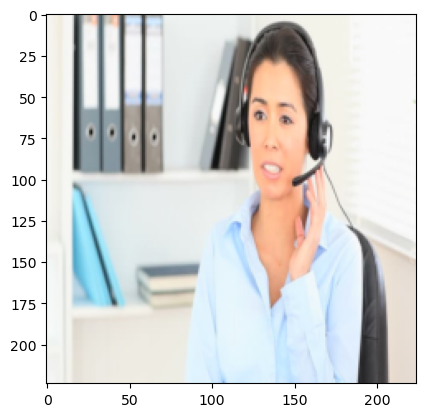

In [41]:
# Just a test to see that the images are being loaded correctly

image = F.to_pil_image(images[1201].squeeze(0))
plt.imshow(image)
plt.show()

In [24]:
!pip install -U sentence-transformers

In [45]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

caption = labels[1201]
print(caption)
output = caption4
model = SentenceTransformer('bert-base-nli-mean-tokens')
cap_embedding = model.encode(caption)
out_embedding = model.encode(output)

accuracy= cosine_similarity(cap_embedding.reshape(1,-1), out_embedding.reshape(1,-1))
print(accuracy)

['smiling office worker answering the phone with a headset']


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[0.12788512]]


In [ ]:
train_model(model, train_data, valid_data, num_epochs=10, learning_rate=1e-4, bathc_size=64):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    accuracies = []
    losses = []
    
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=True)
    
    start_time = time.time()
    
    for epoch in num_epochs:
        model.train()
        for image, captions in train_loader:
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images, captions[:-1])
            loss = criterion(outputs.reshape(-1, len(vocab)), captions.reshape(-1))
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
        
        # Validation
        accuracy = get_accuracy(model, val_dataloader, vocab, batch_size=batch_size)

        accuracies.append(accuracy)
        losses.append(loss.item())